#AI Computer Assignment #4
#Hossein Entezari Zarch
#810196419
##Spring 2020


#Import Packages
At first we import needed packages on different parts of the assignment.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier

##Read In the Data
In this part we read the data from .csv file with read_csv() function in pandas library, accoring the configuration present in parameters, we set the first column as index column containing the indicis of the rows and labeled Yes and No as True and False values.

In [0]:
data = pd.read_csv("data.csv", true_values=["Yes"], false_values=["No"], index_col="Unnamed: 0")

#Phase0
##Data PreProcess
Country: In order to convert string containing information about country we defined two functions following two approaches:

 -1. label: Through this approach we allocate a unique integer for each country and store it in the country column.

 -2. one hot: Through this approach, we defined new columns for each counetry value we have and store the counrty value in a one hot approach, and absolutely we omitted the counrty column finally.

Finally We decided to use one-hot method encoding in LogisticRegression & KNN alogorithms as they use the numeric value of feature in their arithmatic proccedure such as distance computaion in KNN and multiplying by weights in LogisticRegression, and we used the other method of labeling in decision tree which totally based on that if the feature values are the same or not.

Date:In order to convert the date to processable values we convert the containing string to date and then with extracting the year and month and day values of the date we put them as three new attributes in data in order to get more information from date in our machine and prevent the overfitting.

Normalization: We defined normalize_data() function which performs the normalization process for us and it would help us in seeing a progressed classification algorithm.

At the end we defined a function named "preprocess_data" which calls the defined functions serially on the given data and puts the preprocessed data on the output.

Quantization: Also, as decision tree is based on labeled values, we decided to use labels for each period of data in 'Total Price' field where values are fractional and we used quantization method on this field in decision tree to prevent overfitting.

In [0]:
def label_countries(data):
    country_transform = data["Country"].value_counts().to_dict()
    for i, country in enumerate(country_transform):
        country_transform[country] = i+1
    data.replace({"Country": country_transform}, inplace=True)
    return data

def quantize_total_prices(data):
    price_transform = data['Total Price'].value_counts().to_dict()
    for i, period in enumerate(price_transform):
        price_transform[period] = i+1
    data.replace({"Total Price": price_transform}, inplace=True)
    return data

def one_hot_countries(data):
    # data = data.join(pd.get_dummies(data.Country))
    enc = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(enc.fit_transform(data[['Country']]).toarray())
    data = data.join(enc_df)
    data = data.drop('Country', axis=1)
    return data

def seperate_date(data):
    data['year'] = pd.to_datetime(data['Date']).dt.year
    data['month'] = pd.to_datetime(data['Date']).dt.month
    data['day'] = pd.to_datetime(data['Date']).dt.day
    data = data.drop('Date', axis=1)
    return data

def normalize_data(X):
    x_columns = X.columns
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    X = pd.DataFrame(X, columns=x_columns)
    return X

def preprocess_data(data, countries_label):
    if countries_label == "label":
        data = label_countries(data)
        data = quantize_total_prices(data)
    else:
        data = one_hot_countries(data)

    data = seperate_date(data)
    y = data["Is Back"]
    X = data.drop("Is Back", axis=1)
    X = normalize_data(X)
    return X, y

##Information Gain
Information gain is measurement on finding that how much the label is dependant on a specific input feature of data.

We defined the "information_gain(X,y)" function gives the data and its labels as input and gives us the information gain value of each data feature with respect to the label of the data.

We plotted the results, on the first plot you see the values of information according to each of features which gives us a vision on how they are important to label data and we see that the value according to the month is the highest and it means that, the label values are the most dependant on month value of transaction among others.

The second plot shows us the information gains on different countries when we used the one hot method to encode country values. If the i-th country has a high value of gain, it means that happing the transaction in that country or not gives us a high level of information on predicting the labels among other countries to be happened at.

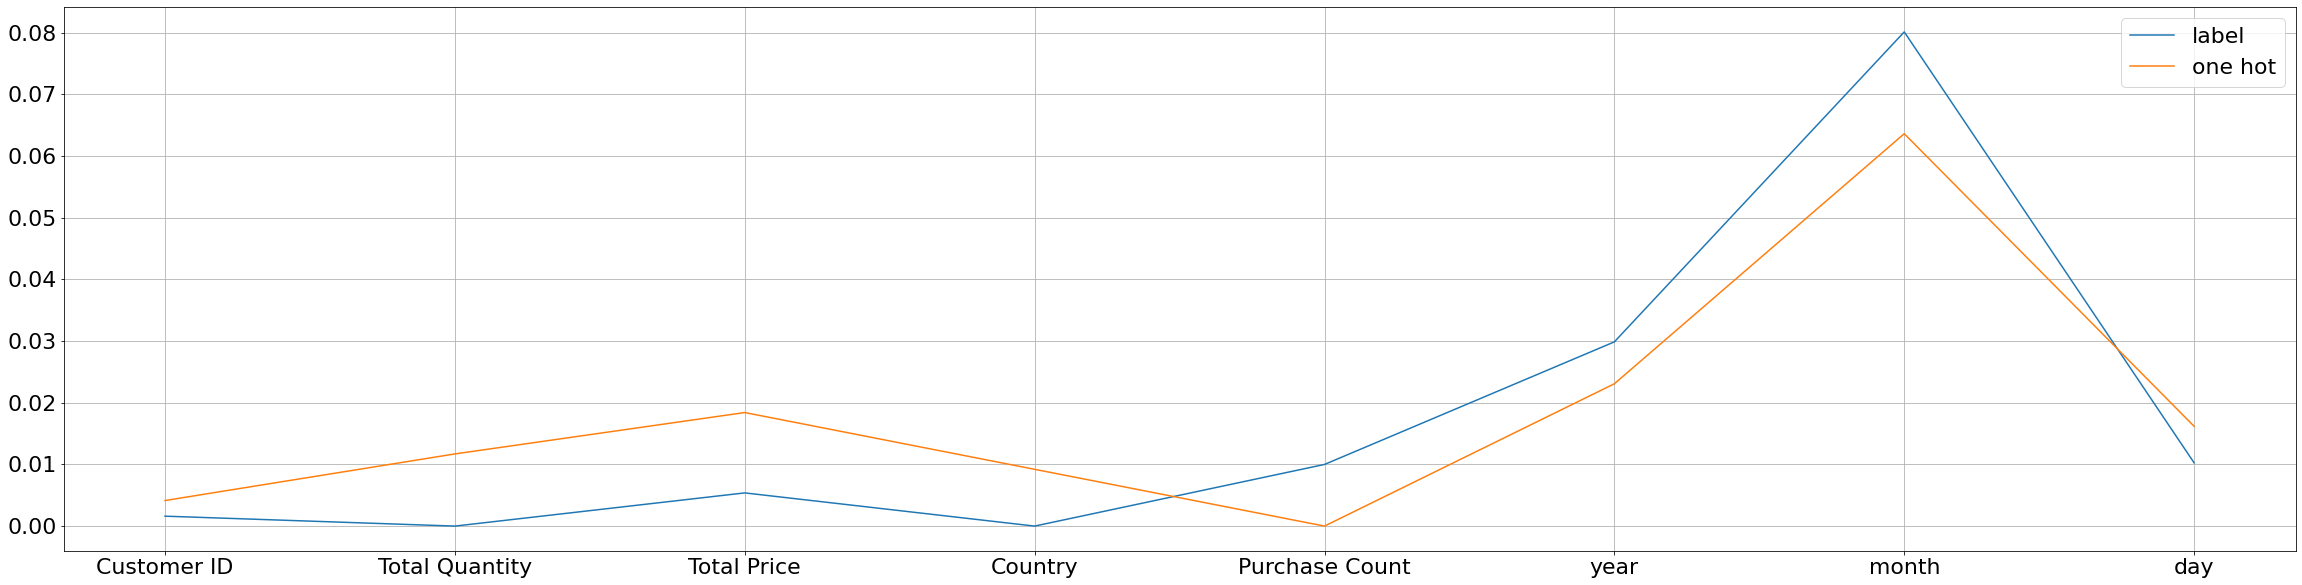

No handles with labels found to put in legend.


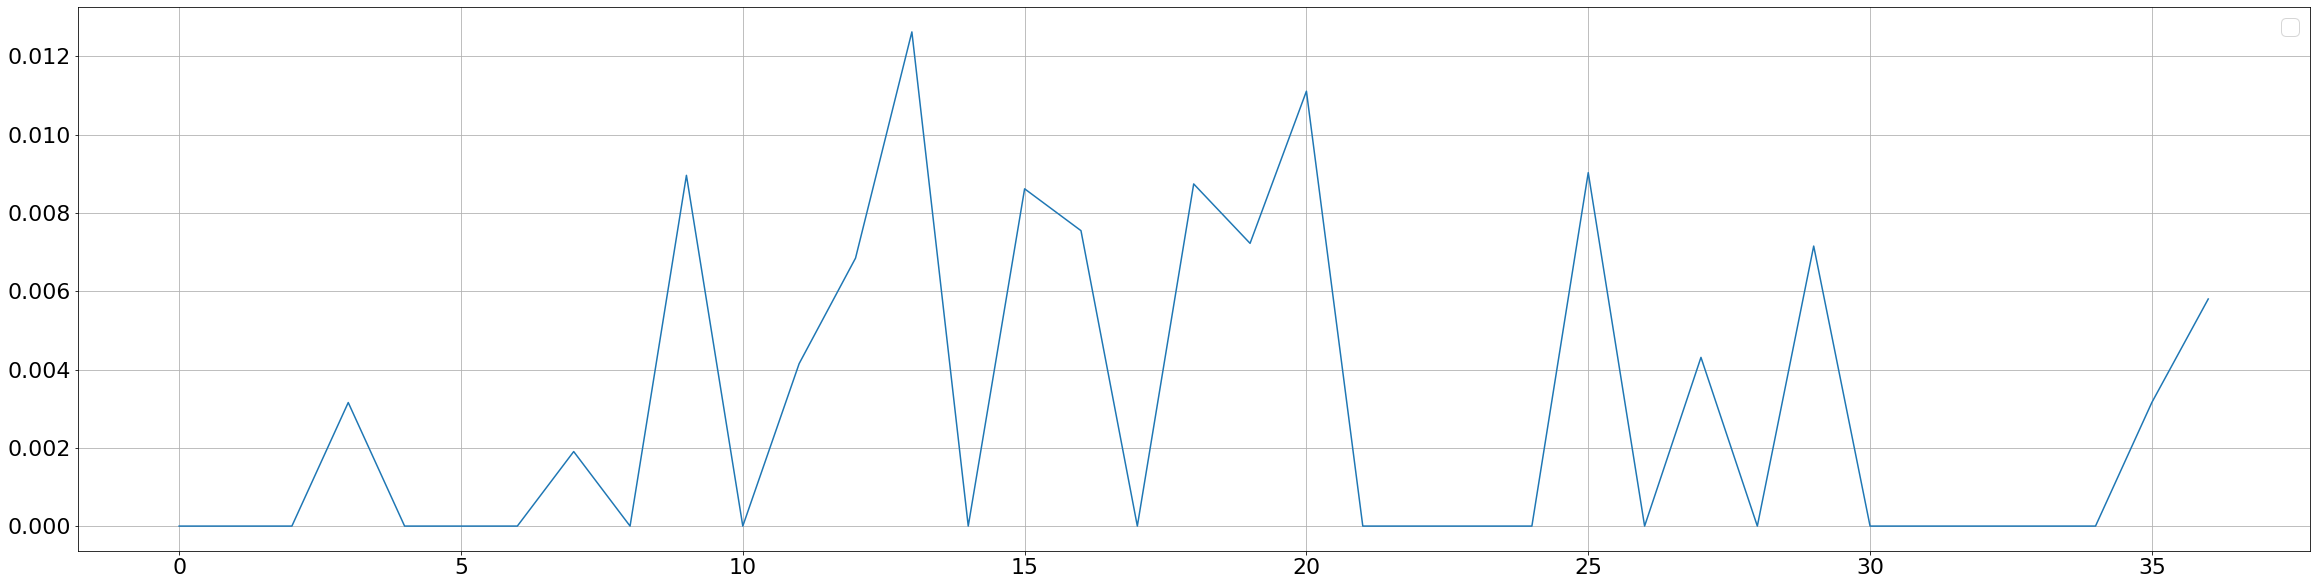

In [46]:
def information_gain(X, y):
    ans = [[], []]
    for col in X.columns:
        col_gain = mutual_info_classif(np.expand_dims(X[col].to_numpy(), 1), y)
        # ans.append([col, col_gain])
        ans[0].append(col)
        ans[1].append(col_gain)
    return ans

def plot_compare(gains, labels = []):
    plt.figure(figsize=(40, 10))
    plt.rcParams.update({'font.size': 22})
    
    for i, gain in enumerate(gains):
        if i < len(labels):
            plt.plot(gain[0], gain[1], label = labels[i])
        else:
            plt.plot(gain[0], gain[1])
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_lists(lists, labels=[], title='', xLabel='', yLabel=''):
    plt.figure(figsize=(40, 10))
    # fig = plt.figure()
    plt.rcParams.update({'font.size': 22})
    plt.rcParams['figure.figsize'] = [40, 10]

    for i, li in enumerate(lists):
        if i < len(labels):
            plt.plot(range(len(li)), li, label=labels[i])
        else:
            plt.plot(range(len(li)), li)
    # fig.suptitle(title, fontsize=24)
    plt.xlabel(xLabel, fontsize=22)
    plt.ylabel(yLabel, fontsize=22)
    plt.legend()
    plt.grid(True)
    plt.show()

X, y = preprocess_data(data, "label")
gains = information_gain(X, y)
X2, y2 = preprocess_data(data, "one_hot")
gains2 = information_gain(X2, y2)

gains2_part1 = [gains2[0][:7], gains2[1][:7]]
gains2_part2 = [gains2[0][7:], gains2[1][7:]]
plot_compare([gains, gains2_part1], ["label", "one hot"])
plot_compare([gains2_part2])

#Phase1
##Dataset Split
In this part with defining function "train_test_slit()" located in sklearn library, we split the dataset in to two parts containing 80 and 20 percents of original dataset.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

##Metrics Calculation

In this block we defined a function that gives us recall values for target labels and also precsion value and accuracy, these metrcis are computed with numbers stored in confusion matrix.

In [0]:
def get_rpa_from_confusion(conf):
    num_true = conf[0][0] + conf[1][0]
    num_false = conf[1][0] + conf[1][1]
    rec_true = conf[0][0]/(conf[0][0]+conf[0][1])
    rec_false = conf[1][1]/(conf[1][1]+conf[1][0])
    recall = ((rec_true * num_true) + (rec_false * num_false))/(num_true + num_false)
    prec_true = conf[0][0]/(conf[0][0]+conf[1][0])
    prec_false = conf[1][1]/(conf[1][1]+conf[0][1])
    precision = ((prec_true * num_true) + (prec_false * num_false))/(num_true + num_false)
    acc = (conf[0][0]+conf[1][1])/(conf[0][0]+conf[0][1]+conf[1][0]+conf[1][1])
    return [recall, precision, acc]

##KNN
Metrics Calculation: We calculated recall and precision values on both train and test datasets by confusion matrix and plotted all of them, also we calcualted the accuracy and F1-Score on both train and test dataset and we found it useful in analyze the high bias and high variance mode.

Plot1: The values of precision and recall values on target labels on train and test dataset are plotted.

Plot2: The values of accuracy on both train and test dataset are plotted.

Plot3: The values of F1-Score on both train and test dataset are plotted.

Choose The Best HyperParameter: In order to choose the best num of neighbors for our model we see the two last plots wich plot the accuracy and F1-Score of the model on both train & test dataset for each value of n-neighbors, we see that for n-neighbors above 20 we do not see any dramatic dhange in accuracy and until 20 the train and test accuracies tend to about a same value near 72% so we choose [n-neighbor = 22] to be the best value for this hyperparameter. with little values of n-neighbor we see a high value of accuracy on train data and a low level of accuracy on test data and this shows us that the model is overfitted.

Recall & Precision: We see that the recall and precision values are about the same values on this configuration and it means that our model is not overfitted and with habing a high accuracy it is not also high bias, so it low bias and low variance.

total label nums 1081 2411
total label nums 299 575
recalls & precisions


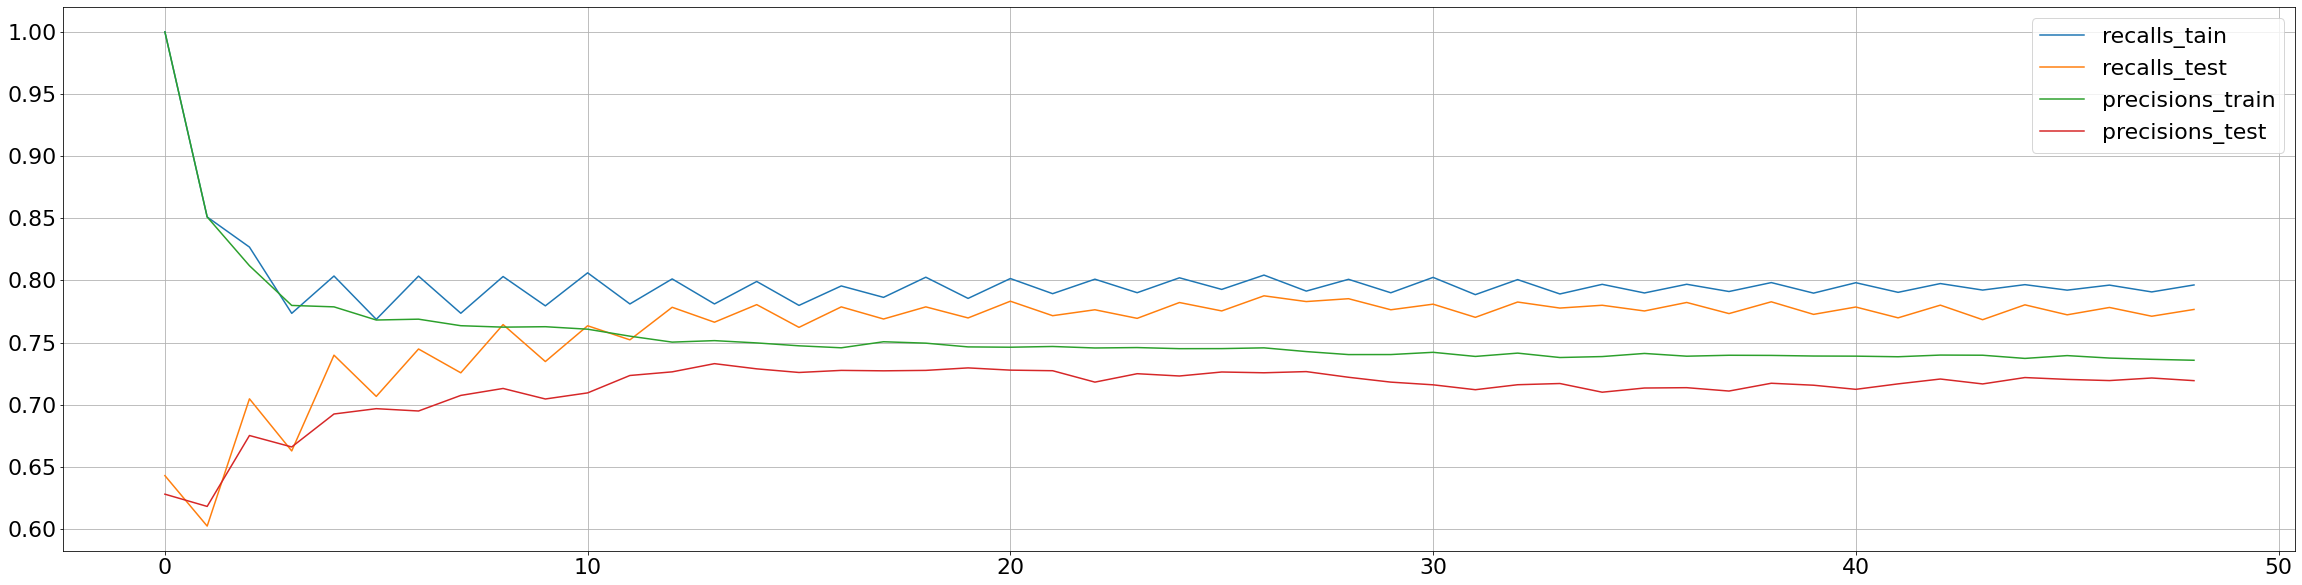

Accuracy


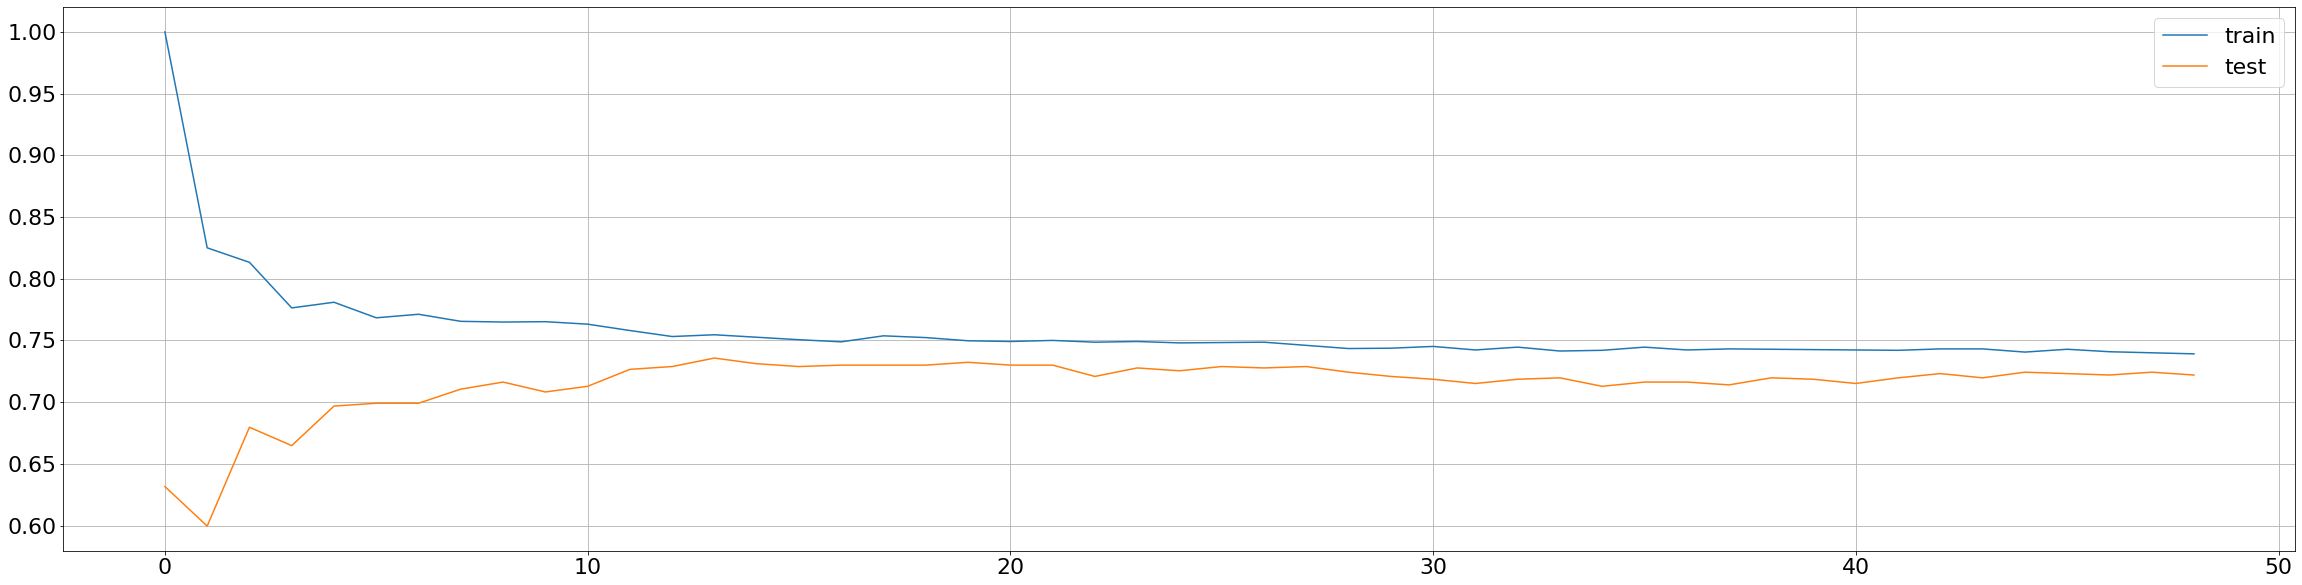

F1-score


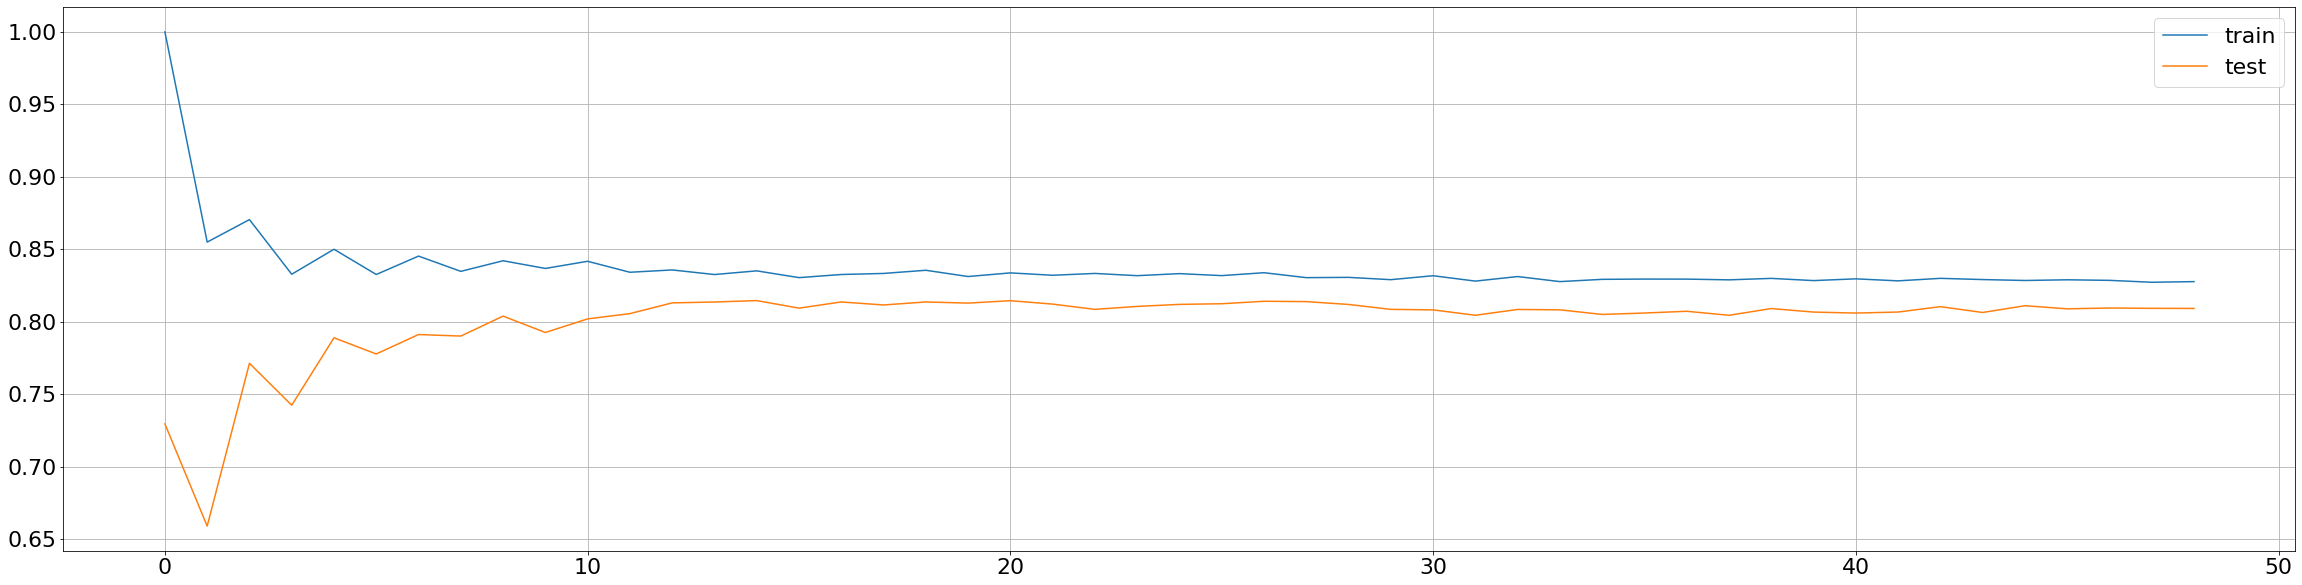

In [37]:
recalls = [[], []]
precisions = [[], []]
accuracies = [[], []]
f1 = [[], []]

for i in range(1, 50):
    classifier_KNN = KNeighborsClassifier(n_neighbors=i)
    classifier_KNN.fit(X2_train, y2_train)

    y2_train_pred = classifier_KNN.predict(X2_train)
    conf_matrix = confusion_matrix(y2_train, y2_train_pred)
    f1[0].append(f1_score(y2_train, y2_train_pred))

    if i == 1:
        print('total label nums', conf_matrix[0][0]+conf_matrix[0][1], conf_matrix[1][0]+conf_matrix[1][1])
    rpa = get_rpa_from_confusion(conf_matrix)
    recalls[0].append(rpa[0])
    precisions[0].append(rpa[1])
    accuracies[0].append(rpa[2])

    y2_test_pred = classifier_KNN.predict(X2_test)
    conf_matrix = confusion_matrix(y2_test, y2_test_pred)
    f1[1].append(f1_score(y2_test, y2_test_pred))

    if i == 1:
        print('total label nums', conf_matrix[0][0]+conf_matrix[0][1], conf_matrix[1][0]+conf_matrix[1][1])
    rpa = get_rpa_from_confusion(conf_matrix)
    recalls[1].append(rpa[0])
    precisions[1].append(rpa[1])
    accuracies[1].append(rpa[2])

print('recalls & precisions')
plot_lists([recalls[0], recalls[1], precisions[0], precisions[1]], labels=['recalls_tain', 'recalls_test', 'precisions_train', 'precisions_test'])
print('Accuracy')
plot_lists(accuracies, labels=['train', 'test'], title='accuracy')
print('F1-score')
plot_lists(f1, labels=['train', 'test'], title='f1')

#Decision Tree

Choose the Best HyperParameter: The last plot shows us that, for max_depth of one the train and test accuracies are so near each other and are about 75% and after that the train starts to increase and the test starts to decrease and the model overfits, so we choose [max_depth=6] as the best value for this hyperparameter.

Recall & Precision: With max_depth of one, the recall and precision values are not near each other and the model is biased, but with increasing the max_depth they start to tend to one on train dataset and they tend to different values on test dataset.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


recalls & precisions


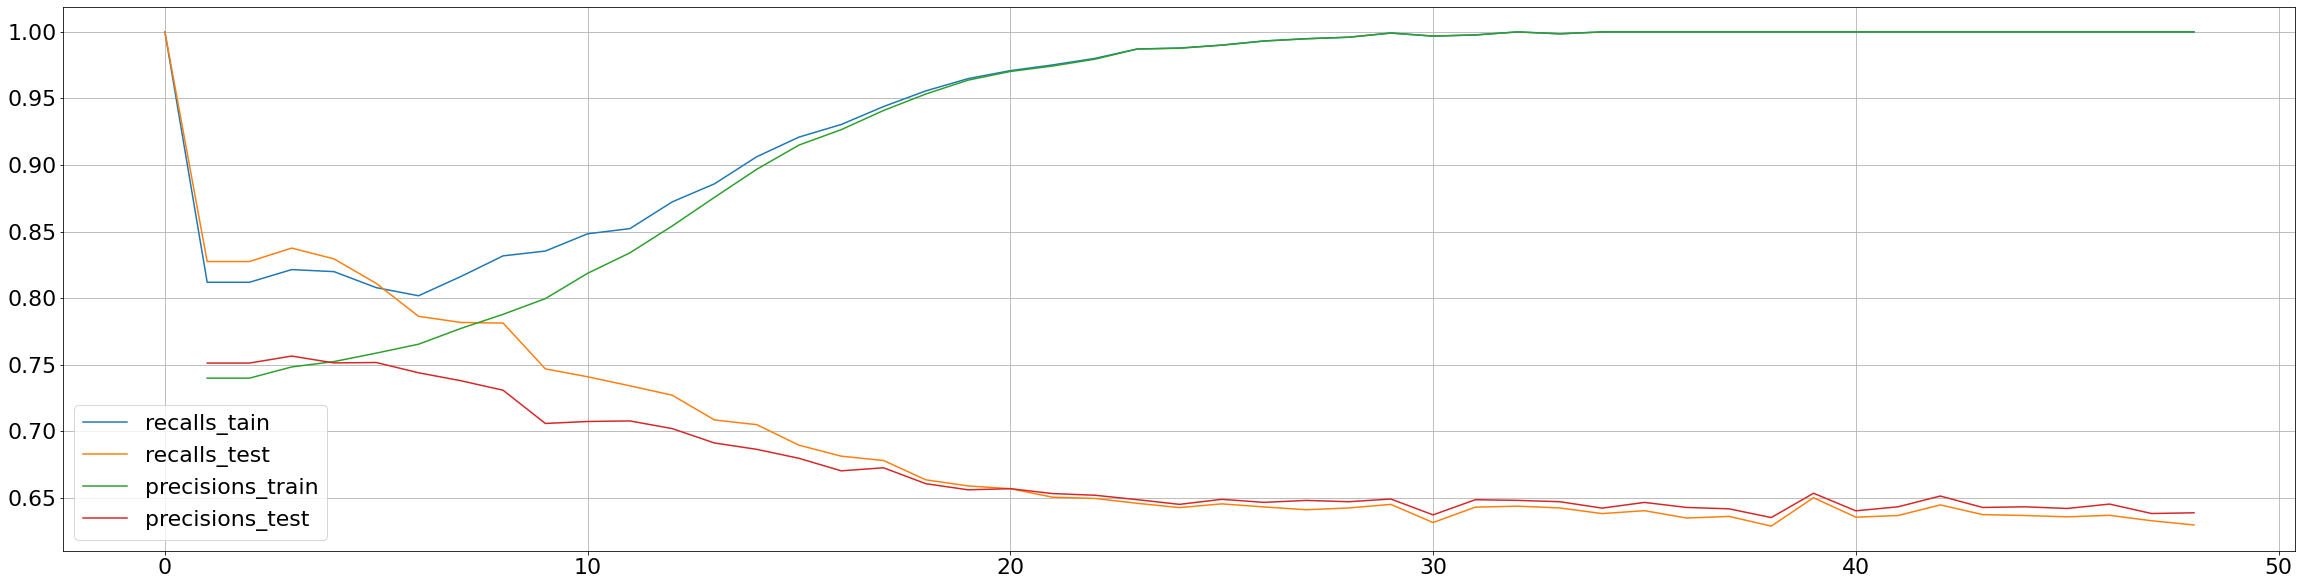

Accuracy


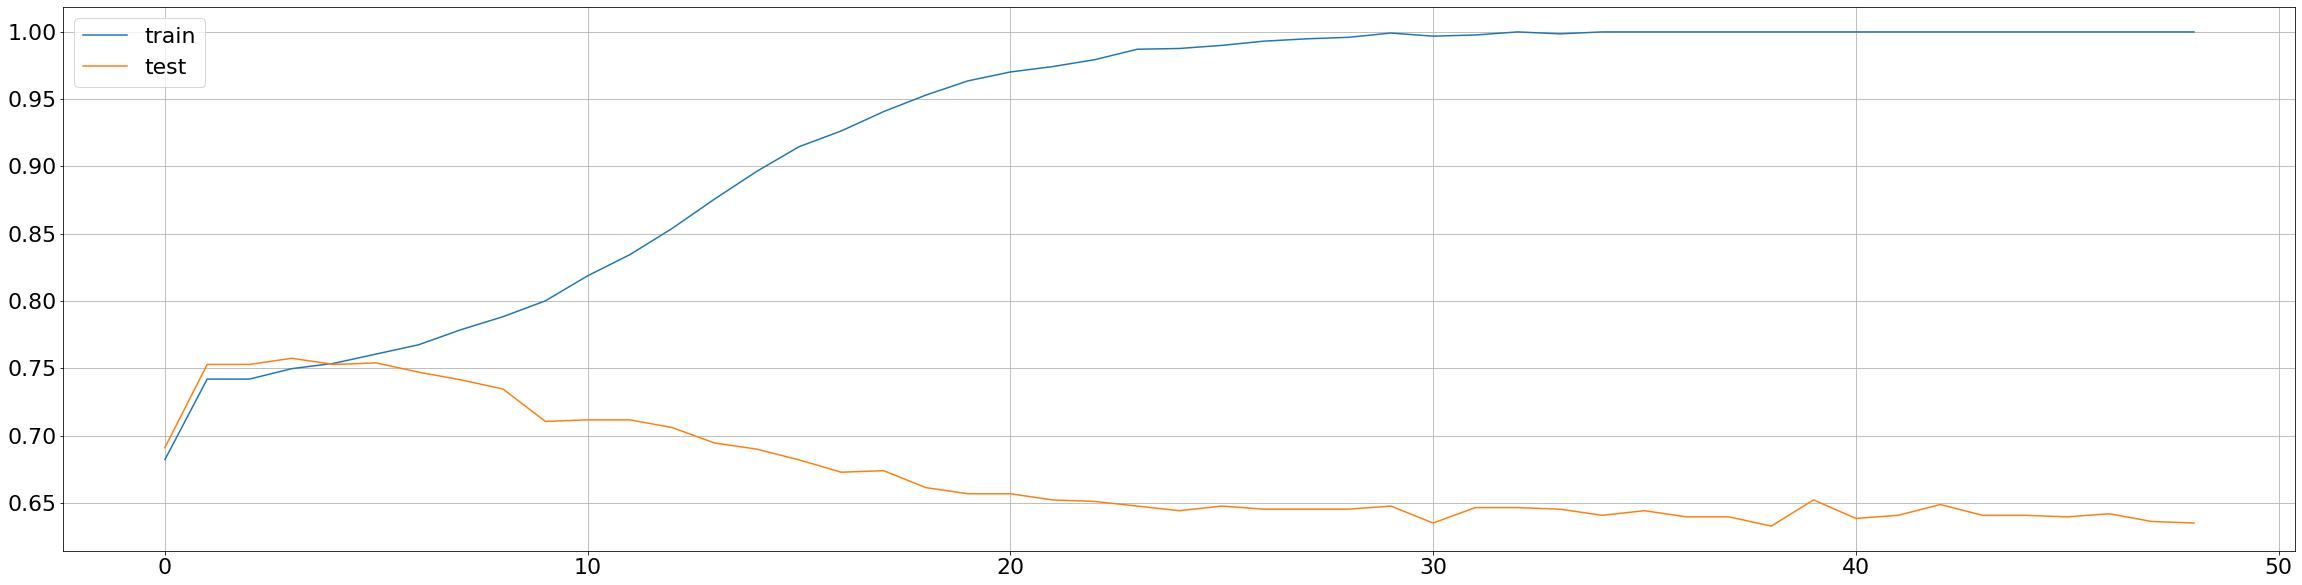

In [38]:
recalls = [[], []]
precisions = [[], []]
accuracies = [[], []]

for max_dpth in range(1, 50):
    classifier_tree = DecisionTreeClassifier(criterion="entropy", max_depth=max_dpth)
    classifier_tree.fit(X_train, y_train)

    y_train_pred = classifier_tree.predict(X_train)
    rpa = get_rpa_from_confusion(confusion_matrix(y_train, y_train_pred))
    recalls[0].append(rpa[0])
    precisions[0].append(rpa[1])
    accuracies[0].append(rpa[2])

    y_test_pred = classifier_tree.predict(X_test)
    rpa = get_rpa_from_confusion(confusion_matrix(y_test, y_test_pred))
    recalls[1].append(rpa[0])
    precisions[1].append(rpa[1])
    accuracies[1].append(rpa[2])

print('recalls & precisions')
plot_lists([recalls[0], recalls[1], precisions[0], precisions[1]], labels=['recalls_tain', 'recalls_test', 'precisions_train', 'precisions_test'])
print('Accuracy')
plot_lists(accuracies, labels=['train', 'test'], title='accuracy')

##Logistic Classification:

In this model, using the normalized data is so important because it uses the values of features in multiplying them with the weights, and also using the one-hot method to encode categorical feature plays a crucial role.

Accuracy: We see that the accuracy on both train and test dataset are both near 75%, and it is not absolutely in a overfit mode because it could also gives a high accuracy on train data.

Recall & Precision: Recall and Precision values are not completely near each other and it means that the model is biased on 'true' target label which is more popular to happen.

In [39]:
classifierLogReg = LogisticRegression(random_state=1).fit(X2_train, y2_train)

y2_train_pred = classifierLogReg.predict(X2_train)
rpa = get_rpa_from_confusion(confusion_matrix(y2_train, y2_train_pred))
print('train--------------------------')
print('recall train', rpa[0])
print('precisions train', rpa[1])
print('accuracy train', rpa[2])

y2_test_pred = classifierLogReg.predict(X2_test)
rpa = get_rpa_from_confusion(confusion_matrix(y2_test, y2_test_pred))
print('\ntest---------------------------')
print('recall test', rpa[0])
print('precision test', rpa[1])
print('accuracy test', rpa[2])

train--------------------------
recall train 0.7777971675951405
precisions train 0.7435473203433672
accuracy train 0.7468499427262314

test---------------------------
recall test 0.7776457776457777
precision test 0.740334084084084
accuracy test 0.7425629290617849


#Phase2

##Bagging KNN

n_estimators: We observed less values of n_estimators gives us better unbiased model with being the recall and precision values near each other, finaaly we chose 5 as the value of this hyperparameter. also the mod

The accuracy metrics are given below the block.

In [40]:
base_classifier = KNeighborsClassifier(n_neighbors=22)
model = BaggingClassifier(base_estimator=base_classifier, n_estimators=5, max_samples=0.5, max_features=0.5, random_state=8)
model.fit(X2_train, y2_train)

y2_train_pred = model.predict(X2_train)
y2_test_pred = model.predict(X2_test)

rpa = get_rpa_from_confusion(confusion_matrix(y2_train, y2_train_pred))
print('train--------------------------')
print('recall train', rpa[0])
print('precisions train', rpa[1])
print('accuracy train', rpa[2])

rpa = get_rpa_from_confusion(confusion_matrix(y2_test, y2_test_pred))
print('\ntest---------------------------')
print('recall test', rpa[0])
print('precision test', rpa[1])
print('accuracy test', rpa[2])


train--------------------------
recall train 0.829301332548038
precisions train 0.73551863493489
accuracy train 0.7376861397479955

test---------------------------
recall test 0.8170759675107502
precision test 0.7106885370970818
accuracy test 0.7116704805491991


##Bagging Decision Tree:

The base model is the best model configured we could build in last phase and now we have 100 of them in a BaggingClassifier and we see that the accuracy is nearly the same as the accuracy of the base model, bagging algorithm could work on an overfit model and in a model that is not biscally overfitted we would not see a dramatic change or progress.

In [41]:
base_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=6)
model = BaggingClassifier(base_estimator=base_classifier, n_estimators=100, max_samples=0.5, max_features=0.5, random_state=8)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
rpa = get_rpa_from_confusion(confusion_matrix(y_train, y_train_pred))
print('train--------------------------')
print('recall train', rpa[0])
print('precisions train', rpa[1])
print('accuracy train', rpa[2])

y_test_pred = model.predict(X_test)
rpa = get_rpa_from_confusion(confusion_matrix(y_test, y_test_pred))
print('\ntest---------------------------')
print('recall test', rpa[0])
print('precision test', rpa[1])
print('accuracy test', rpa[2])

train--------------------------
recall train 0.8680152919027964
precisions train 0.7616874680951521
accuracy train 0.7597365406643757

test---------------------------
recall test 0.8496065470569719
precision test 0.7355604808525005
accuracy test 0.7368421052631579


##Random Forest:

We focused on two hyperparameter n_estimators, max_depth and we plotted the results based on these hyperparameters and the metrics below. We observe from the last plot that, model with n_estimators=8 and max_depth=7, and with this configuration we have a model that is not overfit and its accuracy is about 76%.





recalls & precisions


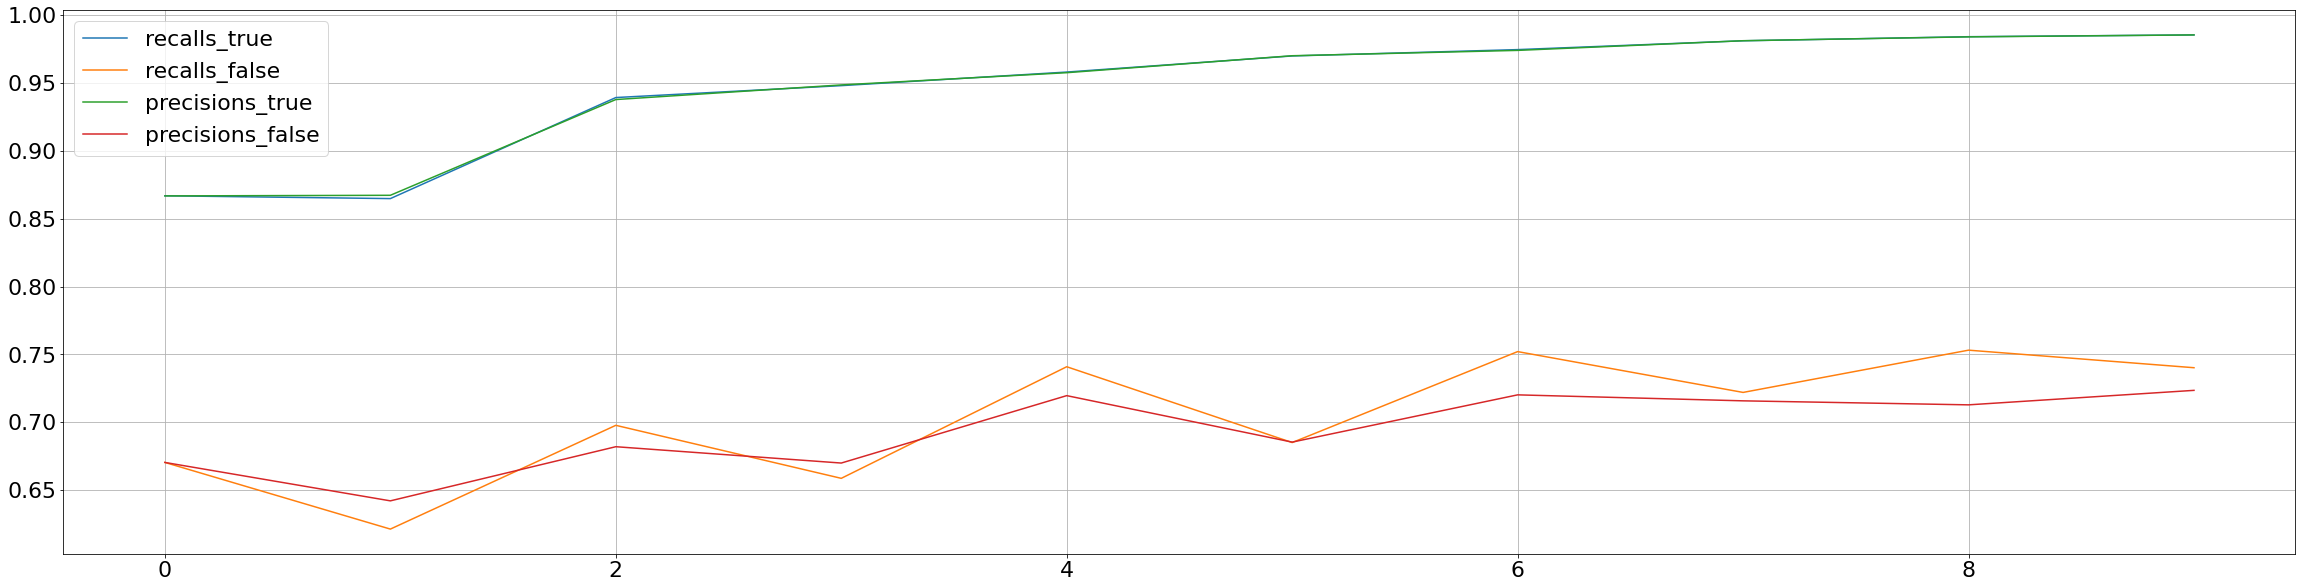

Accuracy


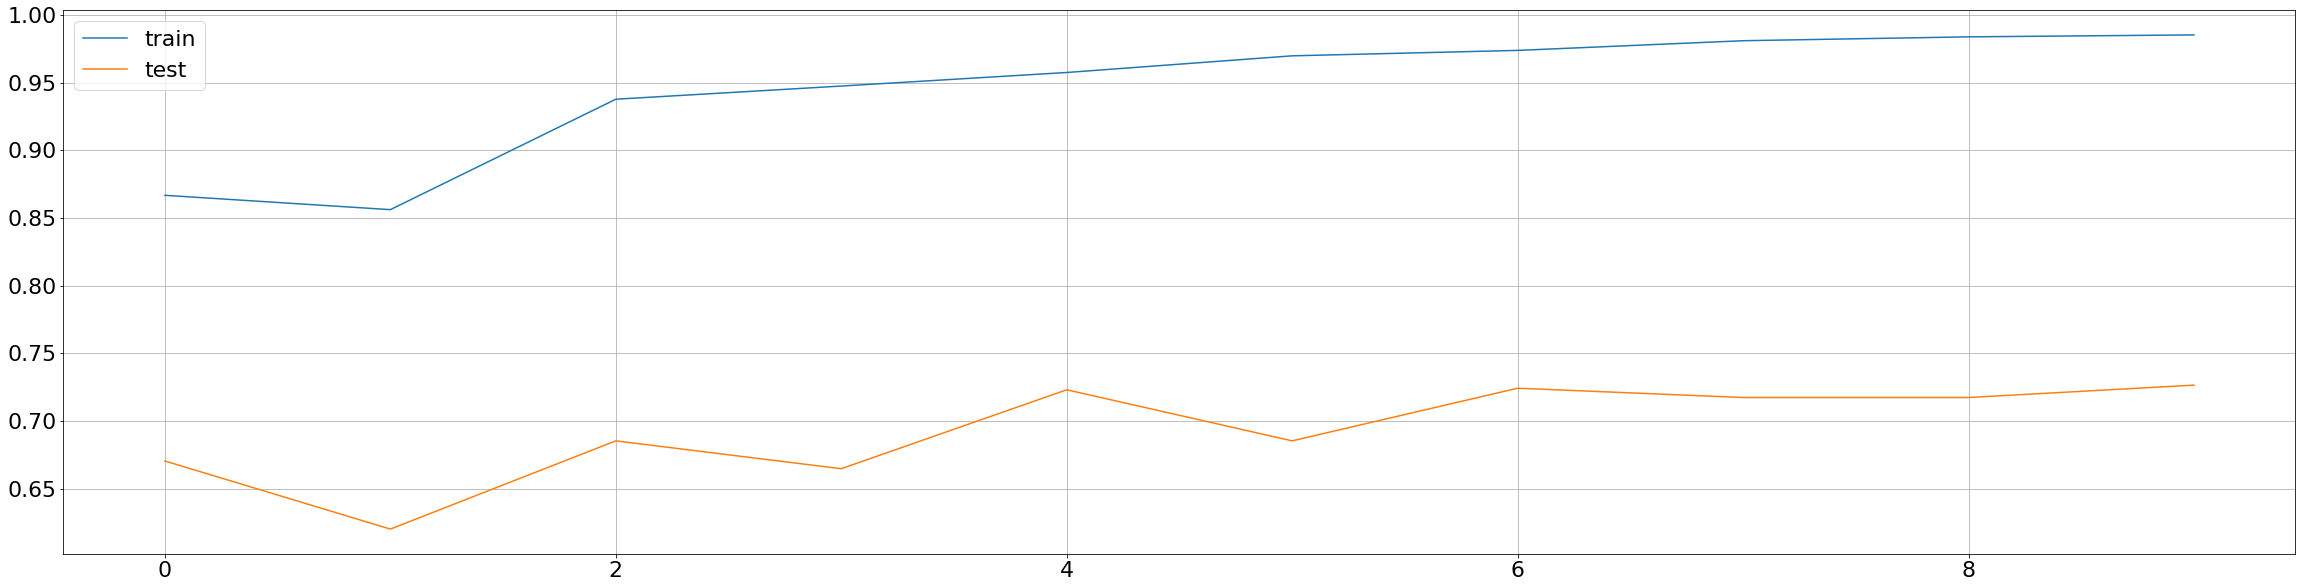

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


recalls & precisions


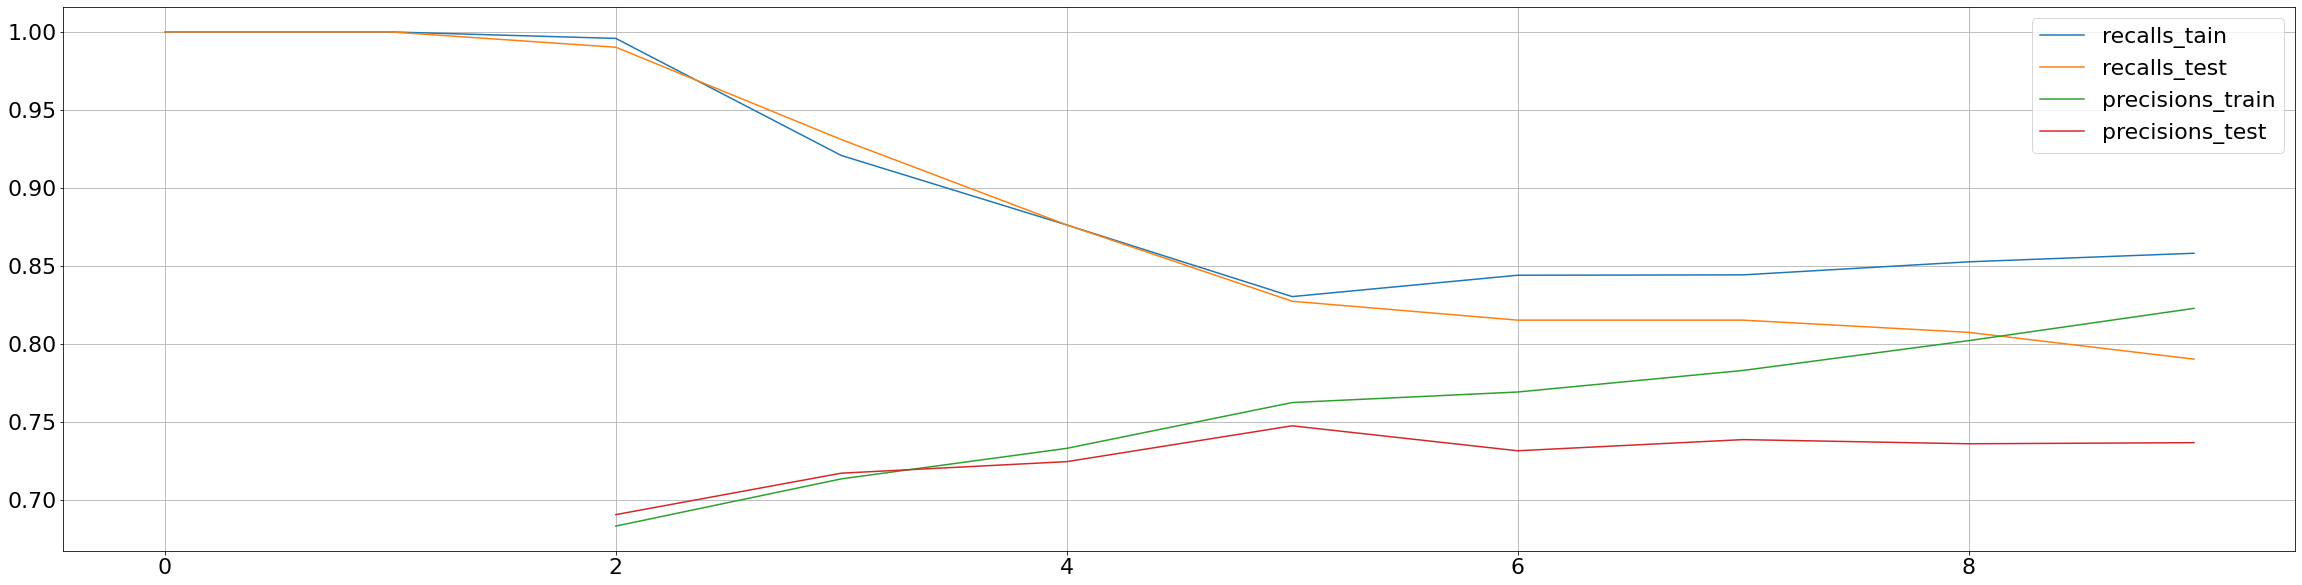

Accuracy


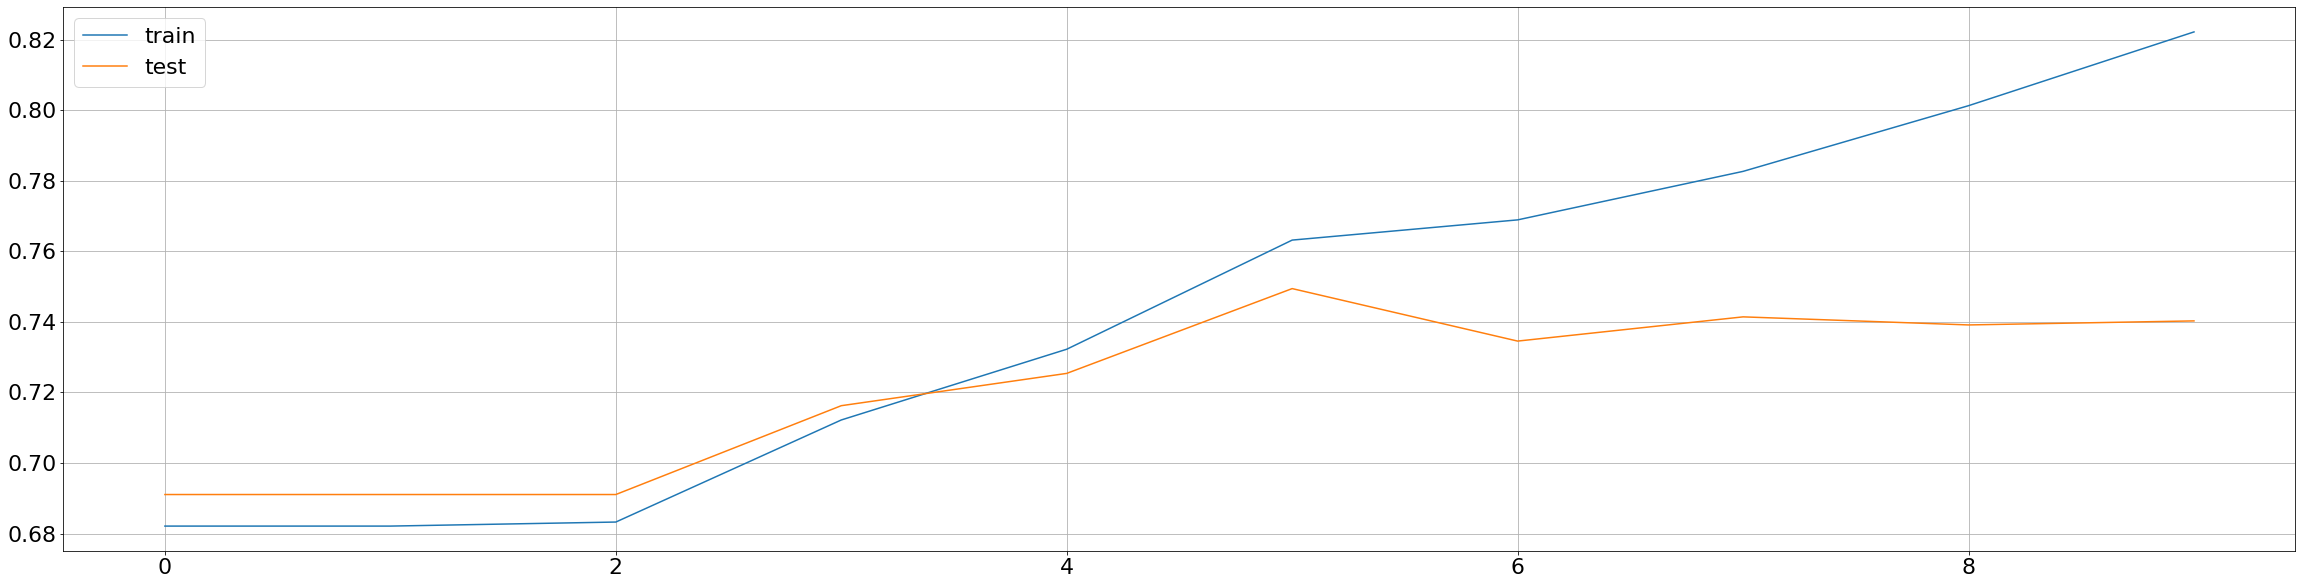

In [42]:
recalls = [[], []]
precisions = [[], []]
accuracies = [[], []]

for n in range(1, 11):
    model = RandomForestClassifier(n_estimators=n, criterion='entropy')
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    rpa = get_rpa_from_confusion(confusion_matrix(y_train, y_train_pred))
    recalls[0].append(rpa[0])
    precisions[0].append(rpa[1])
    accuracies[0].append(rpa[2])

    y_test_pred = model.predict(X_test)
    rpa = get_rpa_from_confusion(confusion_matrix(y_test, y_test_pred))
    recalls[1].append(rpa[0])
    precisions[1].append(rpa[1])
    accuracies[1].append(rpa[2])

print('recalls & precisions')
plot_lists([recalls[0], recalls[1], precisions[0], precisions[1]], labels=['recalls_true', 'recalls_false', 'precisions_true', 'precisions_false'])
print('Accuracy')
plot_lists(accuracies, labels=['train', 'test'], title='accuracy')


recalls = [[], []]
precisions = [[], []]
accuracies = [[], []]

for m in range(1, 11):
    model = RandomForestClassifier(n_estimators=8, criterion='entropy', max_depth=m)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    rpa = get_rpa_from_confusion(confusion_matrix(y_train, y_train_pred))
    recalls[0].append(rpa[0])
    precisions[0].append(rpa[1])
    accuracies[0].append(rpa[2])

    y_test_pred = model.predict(X_test)
    rpa = get_rpa_from_confusion(confusion_matrix(y_test, y_test_pred))
    recalls[1].append(rpa[0])
    precisions[1].append(rpa[1])
    accuracies[1].append(rpa[2])

print('recalls & precisions')
plot_lists([recalls[0], recalls[1], precisions[0], precisions[1]], labels=['recalls_tain', 'recalls_test', 'precisions_train', 'precisions_test'])
print('Accuracy')
plot_lists(accuracies, labels=['train', 'test'], title='accuracy')

##Solve Overfitting by Bagging

Overfitting: The base model is an overfit one as you can observe in its plot, but when we used the bagging model with n_estimators 1, we see a high level progress in not being overfitted, and also when we used higher n_estimators we see that, both accuracies increased, but the overfit and the difference of the accuracies also increased but, as finally with [n_estimators = 10] we had accuracy of 71% on test step and it was 5% higher than this value in n_estimators = 1, we decided this value to be 10 and also we think it is generally a benefcial vlue for this hyperparameter.

In [43]:
base_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=15)
model = BaggingClassifier(base_estimator=base_classifier, n_estimators=30, max_samples=0.5, max_features=0.5, random_state=8)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
rpa = get_rpa_from_confusion(confusion_matrix(y_train, y_train_pred))
print('train--------------------------')
print('recall train', rpa[0])
print('precisions train', rpa[1])
print('accuracy train', rpa[2])

y_test_pred = model.predict(X_test)
rpa = get_rpa_from_confusion(confusion_matrix(y_test, y_test_pred))
print('\ntest---------------------------')
print('recall test', rpa[0])
print('precision test', rpa[1])
print('accuracy test', rpa[2])

train--------------------------
recall train 0.9149879774038698
precisions train 0.8905732501423107
accuracy train 0.8874570446735395

test---------------------------
recall test 0.8457777777777779
precision test 0.7207418288652222
accuracy test 0.7231121281464531


##BootStrapping

Through this approach, we sample subset of our data with replacement multiple times and after generating these subsets, we learn multiple models each one with one of these sample datasets, this approach causes our model to overfit harder and we prevent it from overfitting with lowering the variance. also as we use a subset of the features of data on each model this approach can cause the bias to get higher.


##HardVoting:
In this approach, we defined our three classifier models and then put them in the hard-voting model and after fitting the model on the data, it classified the input data based on the class that is voted as the most among all of given classifiers.

In [44]:
clf1 = KNeighborsClassifier(n_neighbors=22)
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf3 = LogisticRegression(random_state=1)

model = VotingClassifier(estimators=[('knn', clf1), ('dt', clf2), ('lr', clf3)])
model.fit(X2_train, y2_train)

y2_train_pred = model.predict(X2_train)
rpa = get_rpa_from_confusion(confusion_matrix(y2_train, y2_train_pred))
print('train--------------------------')
print('recall train', rpa[0])
print('precisions train', rpa[1])
print('accuracy train', rpa[2])

y2_test_pred = model.predict(X2_test)
rpa = get_rpa_from_confusion(confusion_matrix(y2_test, y2_test_pred))
print('\ntest---------------------------')
print('recall test', rpa[0])
print('precision test', rpa[1])
print('accuracy test', rpa[2])

train--------------------------
recall train 0.7988795814444122
precisions train 0.7500179411475157
accuracy train 0.7528636884306987

test---------------------------
recall test 0.7964354867100863
precision test 0.7492972271025895
accuracy test 0.7505720823798627


#Similarity of Models

In the result shown below you can see the ratio of the answers that are the to all of the answers, and as you see always it is 86% to 90% percent.

In [30]:
clf1 = KNeighborsClassifier(n_neighbors=22)
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf3 = LogisticRegression(random_state=1)

clf1.fit(X2_train, y2_train)
clf2.fit(X2_train, y2_train)
clf3.fit(X2_train, y2_train)

y2_train_pred1 = clf1.predict(X2_train)
y2_train_pred2 = clf2.predict(X2_train)
y2_train_pred3 = clf3.predict(X2_train)
diff_train12 = sum(y2_train_pred1 == y2_train_pred2)/len(y2_train_pred1)
diff_train13 = sum(y2_train_pred1 == y2_train_pred3)/len(y2_train_pred1)
diff_train23 = sum(y2_train_pred2 == y2_train_pred3)/len(y2_train_pred1)
print('train', '1-2', diff_train12, '1-3', diff_train13, '2-3', diff_train23)

y2_test_pred1 = clf1.predict(X2_test)
y2_test_pred2 = clf2.predict(X2_test)
y2_test_pred3 = clf3.predict(X2_test)
diff_test12 = sum(y2_test_pred1 == y2_test_pred2)/len(y2_test_pred1)
diff_test13 = sum(y2_test_pred1 == y2_test_pred3)/len(y2_test_pred1)
diff_test23 = sum(y2_test_pred2 == y2_test_pred3)/len(y2_test_pred1)
print('test', '1-2', diff_test12, '1-3', diff_test13, '2-3', diff_test23)

train 1-2 0.8791523482245132 1-3 0.9146620847651775 2-3 0.8883161512027491
test 1-2 0.8672768878718535 1-3 0.8913043478260869 2-3 0.8707093821510298


##Analyse Ensmble Methods:

Generally, Ensmble with approaches like seeing less amount of data and being less complex prevent overfitting efficiently as you can see the result in part "Solve Overfitting by Bagging" of the report, but in the case where the base models were not overfitted, the ensmble method did not show any dramatic progress and it could not play a crucial role.

Also, in comparision of the prediction of models we observe that they about 90% on the same answer, so making vote between these models can not cause a high level of progress in the model rather than base models theirselves.